In [5]:
from skimage.io import imread
from skimage import img_as_float
import pylab
import math
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm
from skimage import color
import matplotlib.pyplot as plt

### Запись данных в файл

474 713 3


ValueError: the input array must be have a shape == (.., ..,[ ..,] 3)), got (675924, 3)

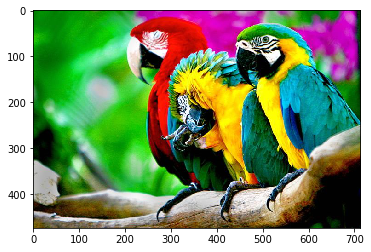

In [22]:
plt.imshow(image)
print(image.shape[0], image.shape[1], image.shape[2])

#image2 = color.hsv2rgb(data[['mid_R', 'mid_G', 'mid_B']])
image2 = color.hsv2rgb(data[['mid_R', 'mid_G', 'mid_B']])
plt.imshow(image2)

In [3]:
image = imread('D:\works\parrots.jpg')
image = img_as_float(image)
data = pd.DataFrame(columns =[ 'x', 'y','R', 'G', 'B'])
index = 0
for i in tqdm(range(0,image.shape[0],1)):
    for j in range(0,image.shape[1],1):
        a,b,c = image[i][j]
        data.loc[index] = i,j,a,b,c  
        index +=1
    data.to_csv(r"D:/works/Result.txt", sep = ' ', header = False, index = False, mode ='a+') 
    data = pd.DataFrame(columns =[ 'x', 'y','R', 'G', 'B'])
plt.imshow(image)

NameError: name 'plt' is not defined

In [8]:
data = pd.read_csv(r"D:/works/Result.txt", names = [ 'x', 'y','R', 'G', 'B'], delim_whitespace = True)
image = imread('D:\works\parrots.jpg')
image = img_as_float(image)
m = image.shape[0]
n = image.shape[1]           
kmeans = KMeans(n_clusters = 11, random_state=241,init='k-means++').fit(data[['R', 'G', 'B']])
data['label'] = kmeans.labels_
data['mid_R'] = 0
data['mid_G'] = 0
data['mid_G'] = 0

data['med_R'] = 0
data['med_G'] = 0
data['med_G'] = 0

mid_col = pd.DataFrame(columns = ['R','G','B'])
med_col = pd.DataFrame(columns = ['R','G','B'])

for i in tqdm(range(kmeans.labels_.min(),kmeans.labels_.max()+1,1)):
    mid_col.loc[i,'R'] = data[data['label'] == i]['R'].mean()
    mid_col.loc[i,'G'] = data[data['label'] == i]['G'].mean()
    mid_col.loc[i,'B'] = data[data['label'] == i]['B'].mean()
    
    med_col.loc[i,'R'] = data[data['label'] == i]['R'].median()
    med_col.loc[i,'G'] = data[data['label'] == i]['G'].median()
    med_col.loc[i,'B'] = data[data['label'] == i]['B'].median()
    
for i in tqdm(range(kmeans.labels_.min(),kmeans.labels_.max()+1,1)):
    data.loc[data['label'] == i,'mid_R'] = mid_col['R'][i]
    data.loc[data['label'] == i,'mid_G'] = mid_col['G'][i]
    data.loc[data['label'] == i,'mid_B'] = mid_col['B'][i]
    
    data.loc[data['label'] == i,'med_R'] = med_col['R'][i]
    data.loc[data['label'] == i,'med_G'] = med_col['G'][i]
    data.loc[data['label'] == i,'med_B'] = med_col['B'][i]
    
# Рассчет качества    
R = sum( (data['R'] - data['mid_R'])**2 )
G = sum( (data['G'] - data['mid_G'])**2 )
B = sum( (data['B'] - data['mid_B'])**2 )
mse = (1/(3*m*n))*(R+G+B)
psnr = 20* math.log10(1/math.sqrt(mse))
print(psnr, ' Для среднего')

R = sum( (data['R'] - data['med_R'])**2 )
G = sum( (data['G'] - data['med_G'])**2 )
B = sum( (data['B'] - data['med_B'])**2 )
mse = (1/(3*m*n))*(R+G+B)
psnr = 20* math.log10(1/math.sqrt(mse))
print(psnr, ' Для медианного значения')


17.11724580492547  Для среднего
16.832042338215132  Для медианного значения


In [157]:
type(image)

numpy.ndarray

ValueError: Incompatible indexer with Series

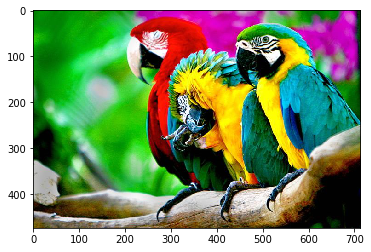

In [154]:
image = imread('D:\works\parrots.jpg')
image = img_as_float(image)
#image2 = color.hsv2rgb(data[['mid_R', 'mid_G', 'mid_B']])
plt.imshow(image)
image.shape[0]
m = image.shape[0]
n = image.shape[1] 
image2 = pd.DataFrame()
index = 0
for i in tqdm(range (0, m-1,1)):
    for j in range(0,n-1,1):
        image2.loc[i,j] = data[['mid_R', 'mid_G', 'mid_B']].iloc[index]   
plt.imshow(image2)

array([[0.61176471, 0.62745098, 0.61960784, ..., 0.59215686, 0.59215686,
        0.59607843],
       [0.61960784, 0.61176471, 0.61568627, ..., 0.6       , 0.6       ,
        0.59607843],
       [0.61960784, 0.61176471, 0.61568627, ..., 0.59607843, 0.6       ,
        0.59607843],
       ...,
       [0.4745098 , 0.49019608, 0.48235294, ..., 0.5254902 , 0.51764706,
        0.45882353],
       [0.45490196, 0.50980392, 0.49411765, ..., 0.52156863, 0.5254902 ,
        0.43921569],
       [0.4745098 , 0.49411765, 0.51372549, ..., 0.52156863, 0.50980392,
        0.44313725]])

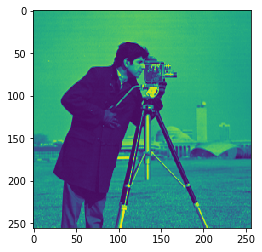

In [122]:
image = img_as_float(data.camera()[::2, ::2])
#image = color.gray2rgb(grayscale_image)
plt.imshow(image)
image